In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load training data
data = np.load("training_data_vectorized.npz")

time = data["time"]                  # (n_samples, n_bins)
flux_normal = data["flux_normal"]    # (n_samples, n_bins)
flux_with_planet = data["flux_with_planet"]  # (n_samples, n_bins)
periods = data["period"]            # (n_samples,)
durations = data["duration"]        # (n_samples,)
depths = data["depth"]              # (n_samples,)

# Print shapes
print("time shape:", time.shape)
print("flux_normal shape:", flux_normal.shape)
print("flux_with_planet shape:", flux_with_planet.shape)
print("periods shape:", periods.shape)
print("durations shape:", durations.shape)
print("depths shape:", depths.shape)

time shape: (2790, 4320)
flux_normal shape: (2790, 4320)
flux_with_planet shape: (2790, 4320)
periods shape: (2790,)
durations shape: (2790,)
depths shape: (2790,)


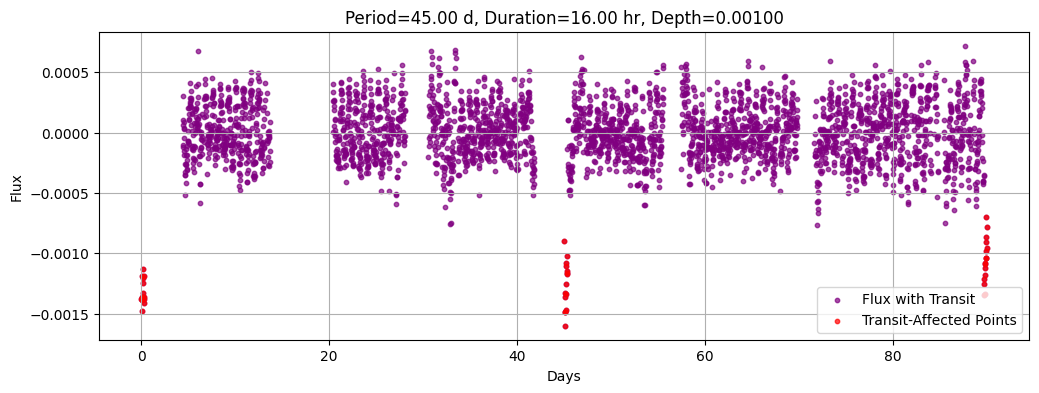

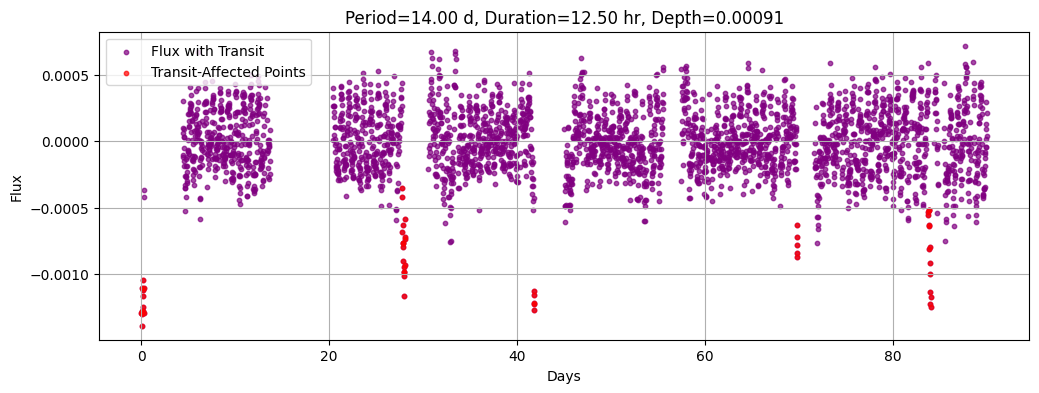

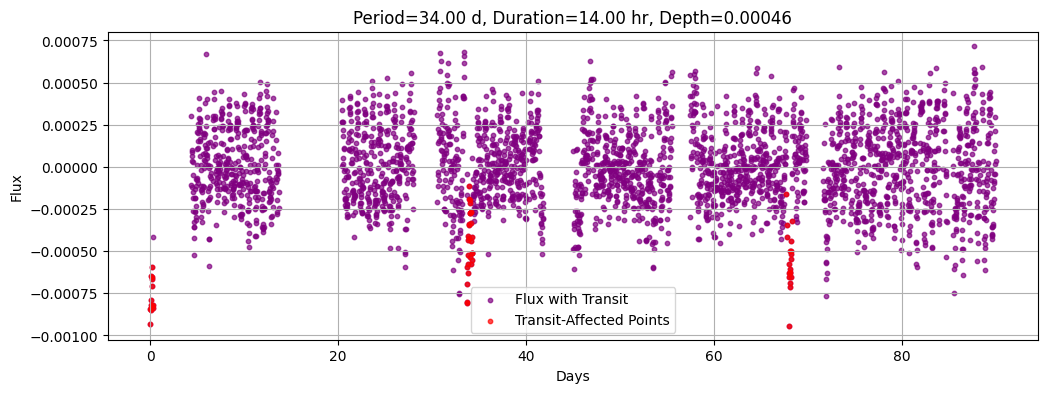

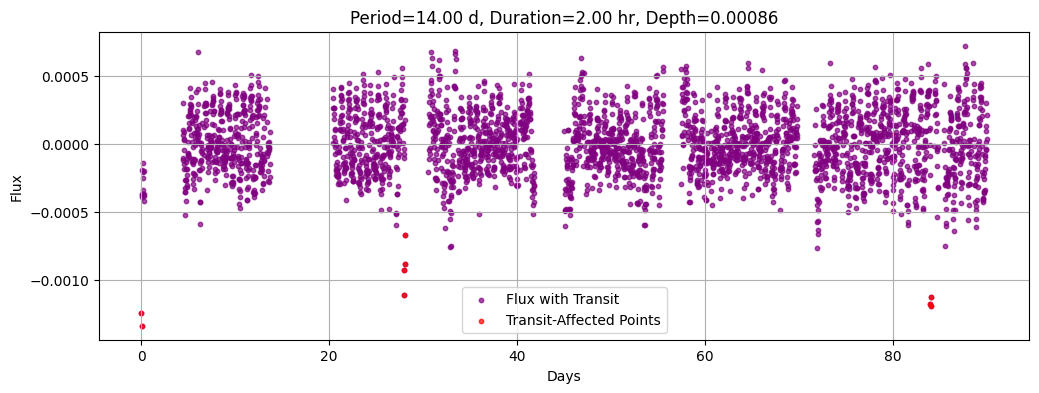

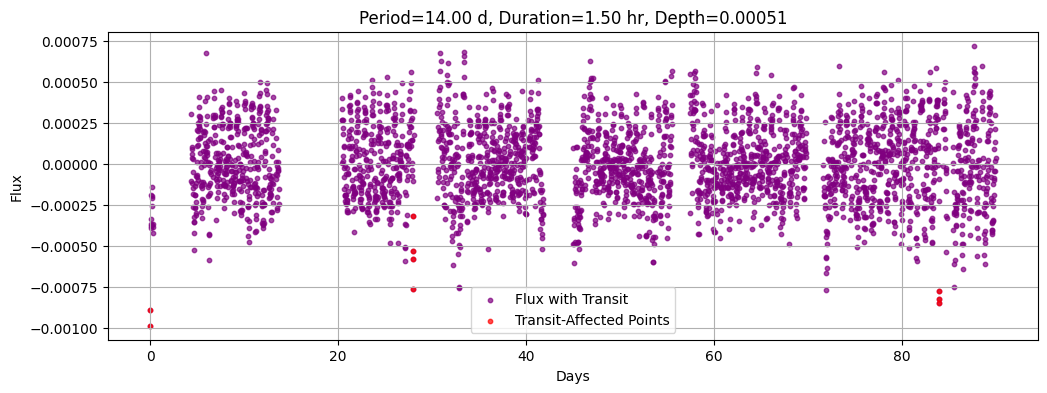

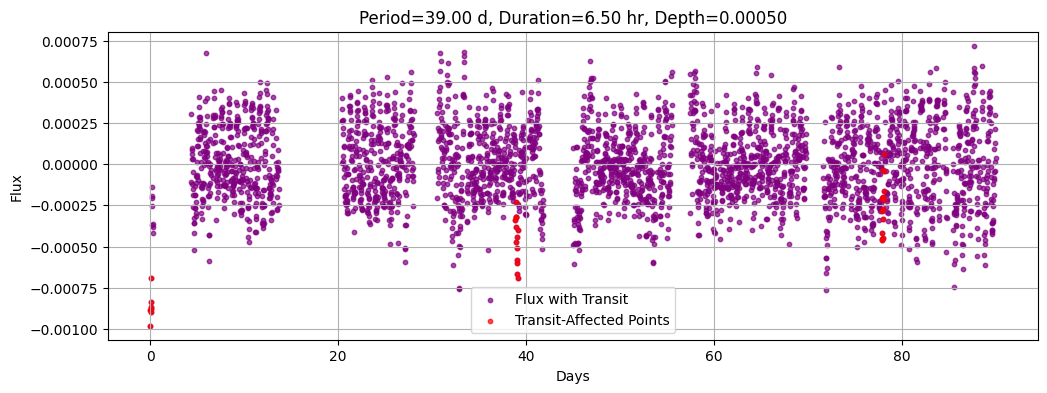

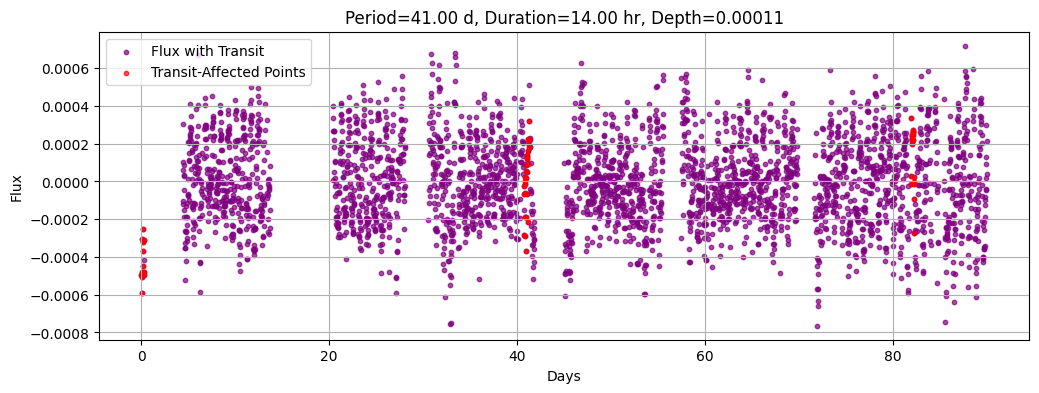

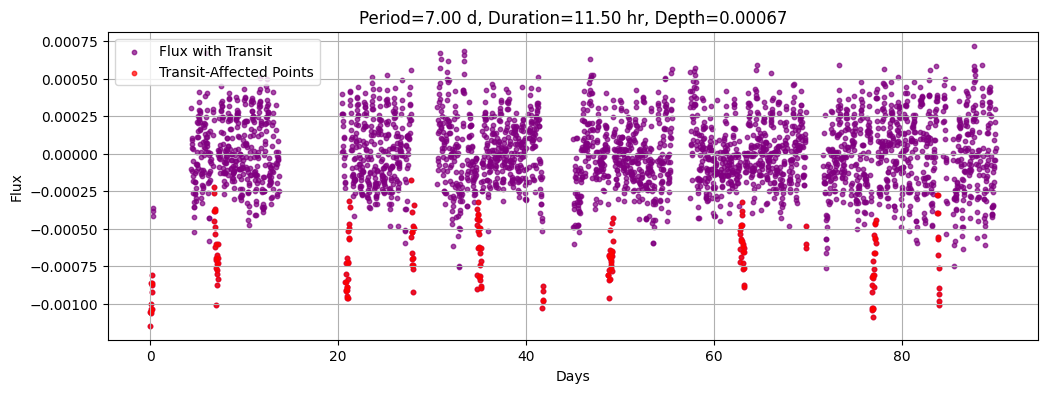

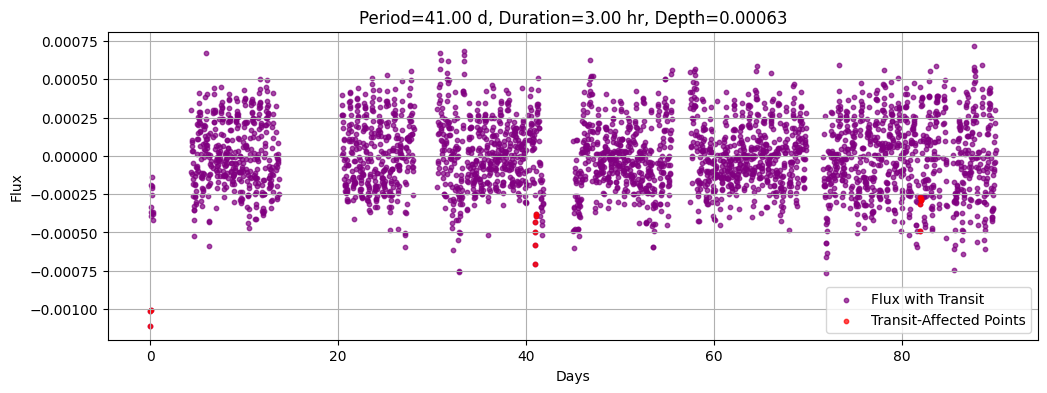

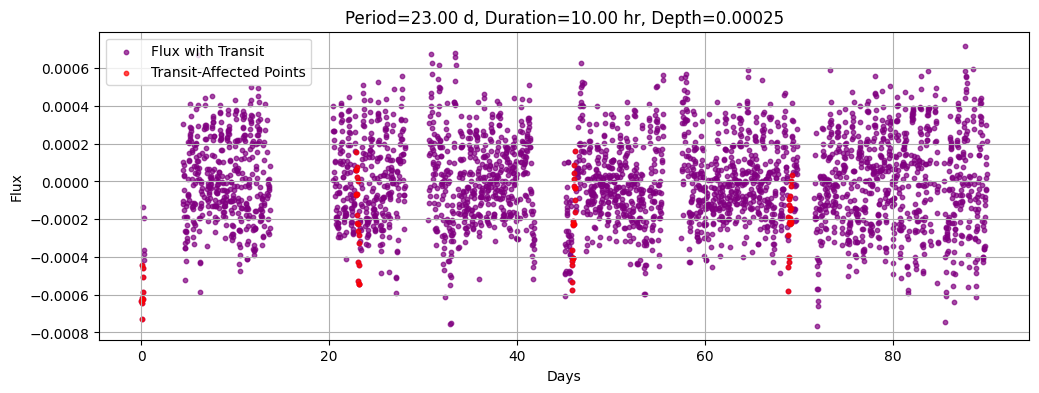

In [3]:
# Plot 10 random examples
n_examples = 10
idx_examples = np.random.choice(len(flux_with_planet), n_examples, replace=False)

for idx in idx_examples:
    # Mask where planet was added (transit points)
    transit_mask = flux_with_planet[idx] != flux_normal[idx]
    
    plt.figure(figsize=(12,4))
    # Full flux with planet
    plt.scatter(time[idx], flux_with_planet[idx], s=10, color="purple", alpha=0.7, label="Flux with Transit")
    # Highlight transit-affected points
    plt.scatter(time[idx][transit_mask], flux_with_planet[idx][transit_mask],
                s=10, color="red", alpha=0.7, label="Transit-Affected Points")
    
    plt.xlabel("Days")
    plt.ylabel("Flux")
    plt.title(f"Period={periods[idx]:.2f} d, Duration={durations[idx]*24:.2f} hr, Depth={depths[idx]:.5f}")
    plt.legend()
    plt.grid(True)
    plt.show()

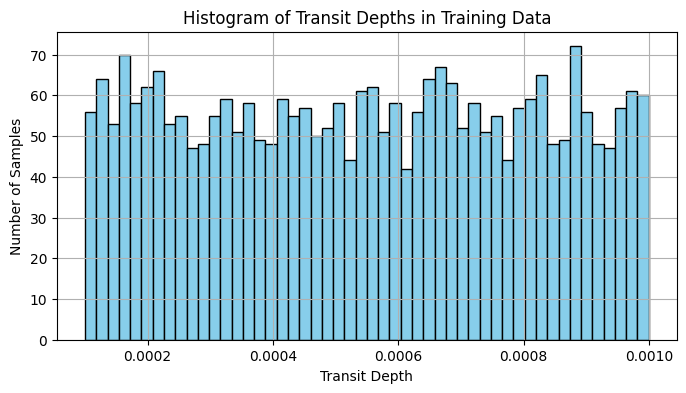

In [4]:
# Plot depths histogram
plt.figure(figsize=(8,4))
plt.hist(depths, bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Transit Depth")
plt.ylabel("Number of Samples")
plt.title("Histogram of Transit Depths in Training Data")
plt.grid(True)
plt.show()